<div id="container" style="position:relative;">
<div style="float:left"><h1> Mahyar Sabouniaghdam</h1></div>
<div style="position:relative; float:right"><img style="height:65px" src ="https://drive.google.com/uc?export=view&id=1EnB0x-fdqMp6I5iMoEBBEuxB_s7AmE2k" />
</div>
</div>

# NLP With Hotel Review Part 2

In this deliverable, you will develop several machine learning models to correctly label the sentiment behind hotel reviews.

**Your target column is the "rating" column which is a binary column denoting good ratings as 1 and bad ones as 0.**

### Modeling :

1. Employ a linear classifier on this dataset:

   a. Fit a logisitic regression model to this data with the solver set to lbfgs. What is the accuracy score on the test set?

   b. What are the 20 words most predictive of a good review (from the positive review column)? What are the 20 words most predictive with a bad review (from the negative review column)? Use the regression coefficients to answer this question.

   c. Reduce the dimensionality of the dataset using PCA, what is the relationship between the number of dimensions and run-time for a logistic regression?

   d. List one advantage and one disadvantage of dimensionality reduction.
   

2. Employ a K-Nearest Neighbour classifier on this dataset:

   a. Fit a KNN model to this data. What is the accuracy score on the test set?

   b. KNN is a computationally expensive model. Reduce the number of observations (data points) in the dataset. What is the relationship between the number of observations and run-time for KNN?

   c. List one advantage and one disadvantage of reducing the number of observations.

   d. Use the dataset to find an optimal value for K in the KNN algorithm. You will need to split your dataset into train and validation sets.
   
   e. What is the issue with splitting the data into train and validation sets after performing vectorization?
   
   
3. Employ a Decision Tree classifier on this dataset:

   a. Fit a decision tree model to this data. What is the accuracy score on the test set?

   b.Use the data set (or a subsample) to find an optimal value for the maximum depth of the decision tree. You will need to split your data set into train and validation.

   c. Provide two advantages of decision trees over KNN. Provide two weaknesses of decision trees (classification or regression trees).
   
   
4. What is the purpose of the validation set, i.e., how is it different than the test set?


5. Re-run a decision tree or logistic regression on the data again:

   a. Perform a 5-fold cross validation to optimize the hyperparameters of your model.

   b. What does your confusion matrix look like for your best model on the test set?
   

6. Create one new feature of your choice:

   a. Explain your new feature and why you consider it will improve accuracy.

   b. Run the model from question 5 again. You will have to re-optimize your hyperparameters. Has the accuracy score of your best model improved on the test set after adding the new feature you created?
   

# Table of Contents

[Loading data & checking high-level details](#Loading-data-&-checking-high-level-details) <br>

[Modeling](#Modeling) <br>

- [Question 1 : Linear Classifier](#Question-1-:-Linear-Classifier)
 - [a](#1a)
 - [b](#1b)
 - [c](#1c)
 - [d](#1d)
 
 
- [Question 2 : KNN Classifier](#Question-2-:-KNN-Classifier)
 - [a](#2a)
 - [b](#2b)
 - [c](#2c)
 - [d](#2d)
 - [e](#2e)


- [Question 3 : Decision Tree Classifier](#Question-3-:-Decision-Tree-Classifier)
 - [a](#3a)
 - [b](#3b)
 - [c](#3c)

 
 
- [Question 4 : Validation Set](#Question-4-:-Validation-Set)
 


- [Question 5 : Hyperparameter Optimization](#Question-5-:-Hyperparameter-Optimization)
 - [a](#5a)
 - [b](#5b)

 
- [Question 6 : Adding New Feature](#Question-6-:-Adding-New-Feature)
 - [a](#6a)
 - [b](#6b)

  

 ##  Loading data & checking high-level details

In [172]:
# import relevant packages

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.model_selection import train_test_split

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

from sklearn.model_selection import cross_val_score


import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import OneHotEncoder
from sklearn.decomposition import PCA

from sklearn.feature_extraction.text import CountVectorizer
import nltk
import string
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.neighbors import NearestNeighbors


- Let's load train and test datasets:

In [245]:
# Load the train and test datasets

train_data = pd.read_csv('clean_train_dataframe.csv')
test_data = pd.read_csv('clean_test_dataframe.csv')

# Split the train dataset into features and Target

X_train = train_data.drop('rating', axis=1)
y_train = train_data['rating']

# Split the test dataset into features and Target

X_test = test_data.drop('rating', axis=1)
y_test = test_data['rating']

- The shape of features and target of test and train datasets:

In [246]:
X_test.shape

(4267, 2743)

In [237]:
y_test.shape

(4267,)

In [247]:
X_train.shape

(12798, 2743)

In [239]:
y_train.shape

(12798,)

- Test data set has 4267 rows and train dataset has 12798 rows. The dataset has 2743 columns and the target column is the "rating" column which is a binary column denoting good ratings as 1 and bad ones as 0.

Now let's check if we have any null values in our columns:

In [248]:
null_columns = X_train.columns[X_train.isna().any()]
print(null_columns)


Index([], dtype='object')


In [249]:
null_columns = X_test.columns[X_test.isna().any()]
print(null_columns)


Index([], dtype='object')


- We don't have any null values' let's check duplicate rows:

In [10]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4267 entries, 0 to 4266
Columns: 2743 entries, Additional_Number_of_Scoring to n_young
dtypes: float64(3), int64(2740)
memory usage: 89.3 MB


In [11]:
X_train.duplicated().sum()

0

In [12]:
X_test.duplicated().sum()

0

In [13]:
X_test.T.duplicated().sum()

56

In [14]:
X_train.T.duplicated().sum()

8

In [15]:
duplicate_columns = X_test.columns[X_test.T.duplicated()]
print(duplicate_columns)


Index(['bed_double', 'bed_queen', 'bed_king', 'group_solo', 'group_family',
       'Hotel_Name_41', 'Hotel_Name_Blakes Hotel',
       'Hotel_Name_COMO The Halkin',
       'Hotel_Name_Crowne Plaza London Kensington',
       'Hotel_Name_Four Seasons Hotel London at Park Lane',
       'Hotel_Name_Knightsbridge Hotel', 'Hotel_Name_Lansbury Heritage Hotel',
       'Hotel_Name_London Hilton on Park Lane',
       'Hotel_Name_London Marriott Hotel Kensington',
       'Hotel_Name_London Marriott Hotel Park Lane',
       'Hotel_Name_Marlin Waterloo', 'Hotel_Name_Old Ship Inn Hackney',
       'Hotel_Name_Sheraton Grand London Park Lane',
       'Hotel_Name_The Arch London', 'Hotel_Name_The Athenaeum',
       'Hotel_Name_The Beaumont Hotel', 'Hotel_Name_The Henrietta Hotel',
       'Hotel_Name_The Leonard Hotel', 'Hotel_Name_The Levin Hotel',
       'Hotel_Name_The Wellesley Knightsbridge a Luxury Collection Hotel London',
       'Hotel_Name_The Zetter Townhouse Clerkenwell', 'p_checkin', 'p_dry',

- We don't have duplicate rows. We have some duplicate columns and it was kind of expected because our dataset is NLP and text data, so there maybe some duplicate rows for each word in hotel reviews.

- Now let's look at our columns and get familiar with the dataset:

In [16]:
for col in X_test.columns:
    print(col)

Additional_Number_of_Scoring
Average_Score
Review_Total_Negative_Word_Counts
Total_Number_of_Reviews
Review_Total_Positive_Word_Counts
Total_Number_of_Reviews_Reviewer_Has_Given
days_since_review
lat
lng
weekday_of_review
month_of_review
year_of_review
bed_single
bed_double
bed_queen
bed_king
trip_leisure
trip_biz
group_solo
group_couple
group_family
Hotel_Name_11 Cadogan Gardens
Hotel_Name_41
Hotel_Name_88 Studios
Hotel_Name_Ace Hotel London Shoreditch
Hotel_Name_Adria Boutique Hotel
Hotel_Name_Aloft London Excel
Hotel_Name_Amba Hotel Charing Cross
Hotel_Name_Amba Hotel Marble Arch
Hotel_Name_Ambassadors Bloomsbury
Hotel_Name_Andaz London Liverpool Street
Hotel_Name_Apex City Of London Hotel
Hotel_Name_Apex London Wall Hotel
Hotel_Name_Apex Temple Court Hotel
Hotel_Name_Arbor City
Hotel_Name_Arbor Hyde Park
Hotel_Name_Ashburn Hotel
Hotel_Name_Avo Hotel
Hotel_Name_BEST WESTERN Maitrise Hotel Maida Vale
Hotel_Name_Baglioni Hotel London The Leading Hotels of the World
Hotel_Name_Batty La

- As we can see our columns is devided to these specific categories:
1. Additional_Number_of_Scoring
2. Average_Score
3. Review_Total_Negative_Word_Counts
4. Total_Number_of_Reviews
5. Review_Total_Positive_Word_Counts
6. Total_Number_of_Reviews_Reviewer_Has_Given
7. days_since_review
8. latitude
9. longitude
10. weekday_of_review
11. month_of_review
12. year_of_review
13. Beds (single, double, queen, king)
14. Trip (leisure or businnes)
15. Travellers group (solo, couple, family)
16. name of hotel
17. words in positive reviews
18. words in negative reviews

In [17]:
 X_test.head(5)

,Additional_Number_of_Scoring,Average_Score,Review_Total_Negative_Word_Counts,Total_Number_of_Reviews,Review_Total_Positive_Word_Counts,Total_Number_of_Reviews_Reviewer_Has_Given,days_since_review,lat,lng,weekday_of_review,...,n_world,n_worry,n_worth,n_would,n_write,n_wrong,n_year,n_yes,n_yet,n_young
0,1005,8.3,0,3469,6,2,297,51.559096,-0.284704,0,...,0,0,0,0,0,0,0,0,0,0
1,487,8.8,46,1805,121,1,4,51.474469,-0.019428,6,...,0,0,0,0,0,0,0,0,0,0
2,570,9.3,0,2319,9,1,590,51.505696,-0.101525,1,...,0,0,0,0,0,0,0,0,0,0
3,2623,8.7,19,12158,0,2,269,51.500961,-0.116591,0,...,0,0,0,0,0,0,0,0,0,0
4,365,8.1,13,1567,0,2,373,51.515125,-0.160066,1,...,0,0,0,0,0,0,0,0,0,0


- Now that we got familiar with the dataset and everything is ready, Let's start the modeling. 

# Modeling

## Question 1 : Linear Classifier

 ### 1a

- In this question I am going to simply only fit the logistic regression without scaling, because on question 1.c I have to scale the data since PCA is sensitive to scailing. So, the scaled accuracy score of the test set will be seen on question 1.c. Here in 1.a we see the unscaled accuracy score of dataset:

In [18]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score


# Fit a logistic regression model with lbfgs solver
logreg = LogisticRegression(solver='lbfgs')
logreg.fit(X_train, y_train)

# Predict on the test set
y_pred = logreg.predict(X_test)

# Find the accuracy score
accuracy = accuracy_score(y_test, y_pred)
print("Test set Accuracy Score: {:.2f}%".format(accuracy*100))


Test set Accuracy Score: 71.88%


In [19]:
# Fitting a model
logreg = LogisticRegression(solver='lbfgs')
logreg.fit(X_train, y_train)

# Training and test score
print(f"Train score: {logreg.score(X_train, y_train)}")
print(f"Test score: {logreg.score(X_test, y_test)}")

Train score: 0.7237849664010002
Test score: 0.7187719709397703


- **As it can be seen the accuracy score on the test dataset is 71.88%.**

### 1b

- For this question first we have to extract only words in positive reviews ( columns starting with 'p_' ) and put them in a seperate dataframe. Then do the same procedure for words in negative reviews ( columns starting with 'n_' ).  

- Positive review columns:

In [20]:
# extract columns starting with 'p_'

X_train_positive = [col for col in X_train.columns if col.startswith('p_')]
positive_df = X_train[X_train_positive]
positive_df.rename(columns=lambda x: x.replace('p_',''), inplace=True)

In [21]:
positive_df 

,,02,1,10,100,11,12,15,1st,2,...,worth,would,wow,x,yard,year,yes,yet,young,yummy
0,2,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12793,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12794,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12795,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12796,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


- It is said that the data is clean. So, stop words should be eliminated but we saw space charachter in the first column. So, we will check how many stopwords we have in the dataset:

In [22]:
import nltk

nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\mahya\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [23]:
import pandas as pd
from nltk.corpus import stopwords



# Create a list of stop words
stop_words = set(stopwords.words('english'))

# Create a new list of column names without stop words
new_col_names = [col.replace('_', ' ') for col in positive_df.columns if col.split('_')[0] not in stop_words]

# Update the column names of the DataFrame
len(new_col_names)


981

- As we can see they are only two and one of them is the first column (space), so I will eliminate the first column and continue:

In [24]:
positive_df = positive_df.drop(positive_df.columns[0], axis=1)

positive_df

,02,1,10,100,11,12,15,1st,2,20,...,worth,would,wow,x,yard,year,yes,yet,young,yummy
0,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12793,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12794,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12795,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12796,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


- Now let's plot the words:

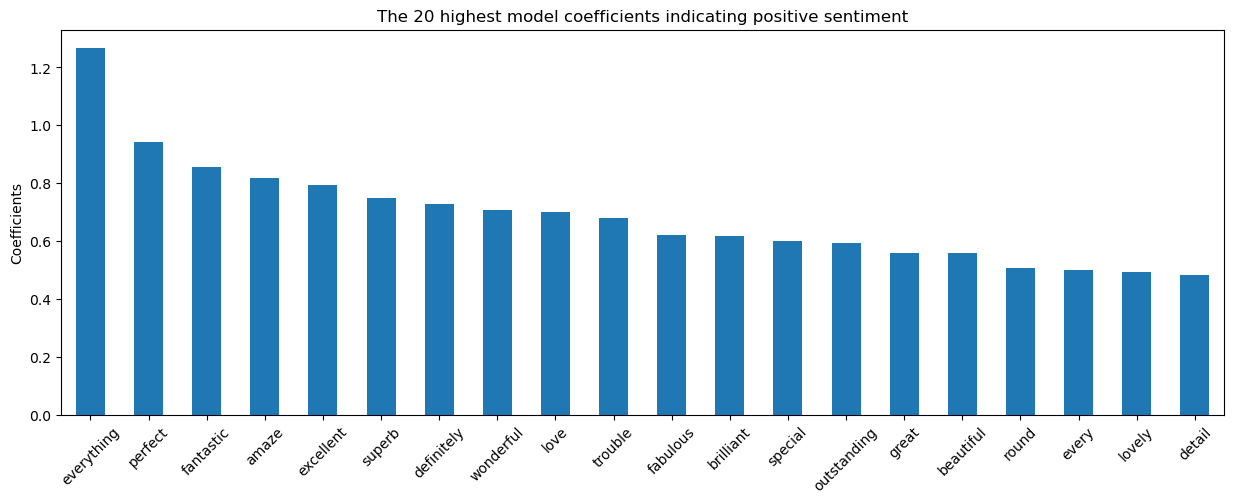

In [25]:
logreg = LogisticRegression(C = 0.1)

logreg.fit(positive_df, y_train)

word_counts = pd.DataFrame(
    {"coefficients": logreg.coef_[0]},
    positive_df.columns
).sort_values("coefficients", ascending=False)

word_counts.head(20).plot(kind="bar", figsize=(15, 5), legend=False)
plt.title("The 20 highest model coefficients indicating positive sentiment")
plt.ylabel("Coefficients")
plt.xticks(rotation=45)
plt.show()

- #### The words from above are the 20 words most predictive of a good review from the positive review columns.

- Now let's move to negative review columns:

In [26]:
# extract columns starting with 'p_'

X_train_negative = [col for col in X_train.columns if col.startswith('n_')]
negative_df = X_train[X_train_negative]
negative_df.rename(columns=lambda x: x.replace('n_',''), inplace=True)

In [27]:
negative_df

,,00,02,1,10,100,11,11am,11pm,12,...,world,worry,worth,would,write,wrong,year,yes,yet,young
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12793,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12794,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12795,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12796,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [28]:
import pandas as pd
from nltk.corpus import stopwords



# Create a list of stop words
stop_words = set(stopwords.words('english'))

# Create a new list of column names without stop words
new_col_names = [col.replace('_', ' ') for col in negative_df.columns if col.split('_')[0] not in stop_words]

# Update the column names of the DataFrame
len(new_col_names)


1342

- For negative columns we have only one stopword and that is space charachter. So, we will remove it:

In [29]:
negative_df = negative_df.drop(negative_df.columns[0], axis=1)

negative_df

,00,02,1,10,100,11,11am,11pm,12,15,...,world,worry,worth,would,write,wrong,year,yes,yet,young
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12793,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12794,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12795,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12796,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


- Now let's plot the words:

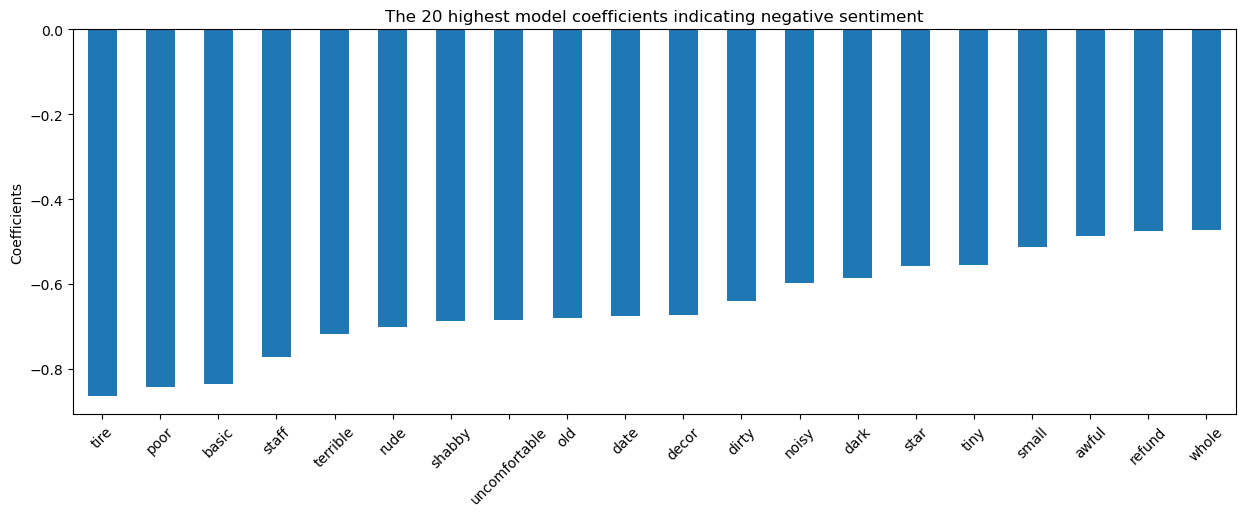

In [30]:
logreg = LogisticRegression(C = 0.1)

logreg.fit(negative_df, y_train)

word_counts = pd.DataFrame(
    {"coefficients": logreg.coef_[0]},
    negative_df.columns
).sort_values("coefficients", ascending=True)

word_counts.head(20).plot(kind="bar", figsize=(15, 5), legend=False)
plt.title("The 20 highest model coefficients indicating negative sentiment")
plt.ylabel("Coefficients")
plt.xticks(rotation=45)
plt.show()

- #### The words from above are the 20 words most predictive of a bad review from the negative review columns.

### 1c

- Our dataset is a countvectorized data mixed with other numeric columns and it is generally a good idea to scale the data before applying PCA even if the data is count-vectorized and also contains other numeric columns that are on different scales. This is because PCA is a linear dimensionality reduction technique that is based on the covariance matrix of the data, and it is sensitive to the scale of the data.



- Count-vectorized data is typically represented as a sparse matrix where each element represents the count of a word in a document. The count of words in the documents can vary significantly, leading to features with large variances, which can affect the PCA algorithm and lead to skewed results. Scaling the data can help to reduce the impact of these large variances by standardizing the data and transforming it to have a mean of 0 and a standard deviation of 1.

In [31]:
from sklearn.preprocessing import StandardScaler

# Scale the data

scaler = StandardScaler()

# Fit and transform the train data and ONLY transform the test data

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

- Here we will use a predetermined threshold for proportion of variance (**method 2**) and we wil pass in the threshold directly into the n_components parameter (0.9).

In [32]:
# PCA import statement

from sklearn.decomposition import PCA

# Lets say we want to keep 90% of the variance

my_PCA = PCA(n_components = 0.9)
my_PCA.fit(X_train_scaled)

# Transform train and test

X_train_PCA = my_PCA.transform(X_train_scaled)
X_test_PCA = my_PCA.transform(X_test_scaled)

In [33]:
print(f'Original: {X_train.shape}')
print(f'PCA Transformed: {X_train_PCA.shape}')

Original: (12798, 2743)
PCA Transformed: (12798, 1891)


- Here we need 1891 PCs to hit the 90% threshold and we cut almost 1k of our features here.

- Now let's fit a model on the original data and compare it to a model fit on the PCA-transformed data:

In [34]:
# Let's use all the default parameters for now
my_logreg = LogisticRegression(solver='lbfgs')

# Fitting to original data
my_logreg.fit(X_train_scaled,y_train)

# Scoring on original train and test sets
print(f'Train Score: {my_logreg.score(X_train_scaled, y_train)}')
print(f'Test Score: {my_logreg.score(X_test_scaled, y_test)}')


Train Score: 0.8860759493670886
Test Score: 0.7328333723927818


In [35]:
# Do the same but fit on the PCA transformed data
my_logreg_PCA = LogisticRegression(solver='lbfgs')

# Fitting to PCA data
my_logreg_PCA.fit(X_train_PCA,y_train)

# Scoring on PCA train and test sets
print(f'Train Score: {my_logreg_PCA.score(X_train_PCA, y_train)}')
print(f'Test Score: {my_logreg_PCA.score(X_test_PCA, y_test)}')


Train Score: 0.8546647913736521
Test Score: 0.7654089524255917


- Using the full original features, we got a slightly better training accuracy. This shouldn't be too surprising since PCA is essentially discarding information by compressing/projecting our data down into a lower dimensionality.


- However, we got even **better results by using 1891-dimensional data rather than 2743-dimensional data!!**


- So, here we saw that by decreasing the dimension, we got even better test score. Now let's find out the relationship between the number of dimensions and run-time for a logistic regression:


In [36]:
%%timeit
my_logreg.fit(X_train_scaled, y_train)

5.12 s ± 218 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [37]:
%%timeit
my_logreg_PCA.fit(X_train_PCA,y_train)

2.94 s ± 53.2 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


- The relationship between the number of dimensions and run-time for a logistic regression is that as the number of dimensions in the dataset decreases, the run-time for a logistic regression model typically decreases as well. This is because logistic regression is a linear model, and as the number of dimensions decreases, the model considers less parameters and the computational cost of fitting the model also decreases. Therefore, reducing the dimensionality of the data using PCA can help to speed up the training and prediction time of a logistic regression model.

- As we saw from the code above by reducing features, the model becomes less computationally expensive to train so there are fewer features to include in model computation. Therefore, the run-time decreases by using PCA. 

 ### 1d

- One advantage of dimensionality reduction:
 - One of the main advantages of PCA is that it can reduce the number of features in a dataset, which can help to reduce the storage and computational requirements of the model. This can be particularly useful when working with high-dimensional datasets.


- One disadvantage of dimensionality reduction:
 - A disadvantage of PCA is that it can result in some loss of information and it adds a layer of complexity when presenting results to others, as it reduces the dimensionality of the data by projecting it onto a lower-dimensional subspace. This can lead to a loss of some of the original information and patterns in the data, which can affect the performance of the model.

## Question 2 : KNN Classifier

 ### 2a

- KNN is a distance-based algorithm that calculates the distance between a new data point and the existing data points in the training set in order to make a prediction. If the features in the data have different scales, then the distance between points will be dominated by the features with the largest scales. This can lead to poor performance, as features with larger scales will have more influence on the distance metric.


- So, we understand that KNN is very sensitive to scale since it uses the distance between the data points to make predictions. Features on larger scales with higher variance will dominate the distance which can often hurt the model performance when there are informative features on much lower scales.


- Then, we will scale the dataset with standard scaler and then fit KNN Classifier on the dataset.( we scaled our data in 1.c question before so I will copy paste the code here to refresh our mind and the fit the model):

In [38]:
from sklearn.preprocessing import StandardScaler

# Scale the data

scaler = StandardScaler()

# Fit and transform the train data and ONLY transform the test data

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

- Now let's find the best number of neighbours for the KNN model:

In [39]:
# ****Running this code will take a lot of time***** 

# KNN Model

from sklearn.neighbors import KNeighborsClassifier

neighbors = range(1,50,2)

train_acc = []
test_acc = []

for neighbor in neighbors:
    
    KNN_model = KNeighborsClassifier(n_neighbors = neighbor)

    KNN_model.fit(X_train_scaled,y_train)

  # append the scores to the lists

    train_acc.append(KNN_model.score(X_train_scaled,y_train))
    test_acc.append(KNN_model.score(X_test_scaled,y_test))



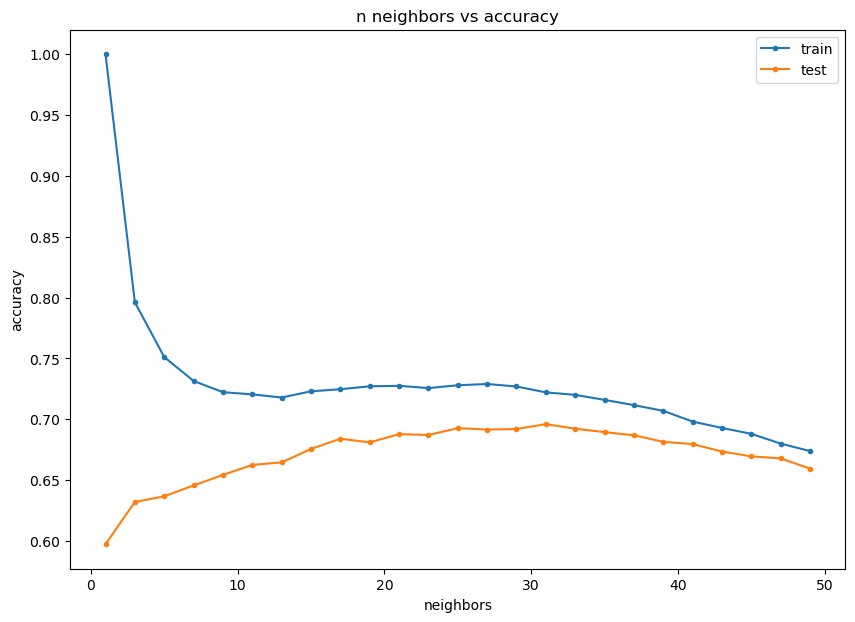

In [40]:
# Plotting 

plt.figure(figsize = (10,7))
plt.plot(neighbors,train_acc,label = "train",marker = ".")
plt.plot(neighbors,test_acc,label = "test",marker = ".")
plt.legend()
plt.title("n neighbors vs accuracy")
plt.xlabel("neighbors")
plt.ylabel("accuracy")
plt.show()

In [41]:
knn_model_results = pd.DataFrame({'neighbors':neighbors,'train_acc':train_acc,'test_acc':test_acc})
knn_model_results['acc_diff'] = knn_model_results['train_acc'] - knn_model_results['test_acc']
knn_model_results.sort_values(['test_acc','acc_diff'],ascending = [False,True]).head(10)

,neighbors,train_acc,test_acc,acc_diff
15,31,0.722144,0.696039,0.026105
12,25,0.728004,0.692758,0.035246
16,33,0.720113,0.692290,0.027823
14,29,0.726989,0.692055,0.034933
13,27,0.729020,0.691587,0.037434
17,35,0.715971,0.689477,0.026494
10,21,0.727536,0.687837,0.039699
11,23,0.725660,0.687134,0.038526
18,37,0.711674,0.686899,0.024774
8,17,0.724723,0.684087,0.040635


- As we can see here the best number of neighbours for the KNN model in our dataset is 31. Now let's fit our model on our unscaled data too, to compare the results:

In [42]:
# Initialize the classification model

KNN_model=KNeighborsClassifier(n_neighbors=31)

KNN_model.fit(X_train, y_train)

print("Number of neighbours is: ", KNN_model.n_neighbors)
print("Train accuracy for unscaled data:", KNN_model.score(X_train, y_train))
print("Test accuracy for unscaled data:", KNN_model.score(X_test, y_test))

Number of neighbours is:  31
Train accuracy for unscaled data: 0.6678387248007501
Test accuracy for unscaled data: 0.6512772439653152


In [43]:
# Initialize the classification model

KNN_model=KNeighborsClassifier(n_neighbors=31)

KNN_model.fit(X_train_scaled, y_train)

print("Number of neighbours is: ", KNN_model.n_neighbors)
print("Train accuracy:", KNN_model.score(X_train_scaled, y_train))
print("Test accuracy:", KNN_model.score(X_test_scaled, y_test))

Number of neighbours is:  31
Train accuracy: 0.7221440850132833
Test accuracy: 0.6960393719240684


- It can be seen that our scores for both train and test for scaled dataset are better.




- **I got 69.6% accuracy score on the test dataset with 31 number of neighbours.**

 ### 2b

- To reduce the number of observations (data points) in the dataset, which it means to reduce the number of rows in dataset, I am going to make a 20% sample of the original train and test datasets with the same distribution of the target column (rating):

In [56]:
# Create a new dataframe that have the same distribution of the rating column for our train dataset

train_sample = train_data.groupby(train_data['rating'], group_keys=True).apply(lambda x: x.sample(frac=0.2, random_state=17))
train_sample.reset_index(drop=True,inplace=True)

# Create a new dataframe that have the same distribution of the rating column for our test dataset

test_sample = test_data.groupby(test_data['rating'], group_keys=True).apply(lambda x: x.sample(frac=0.2, random_state=17))
test_sample.reset_index(drop=True,inplace=True)

# Take a look at the shape of the sample dataset for train and test

print(f"The train sample dataframe has {train_sample.shape[0]} rows and {train_sample.shape[1]} columns")
print(f"The test sample dataframe has {test_sample.shape[0]} rows and {test_sample.shape[1]} columns")

The train sample dataframe has 2560 rows and 2744 columns
The test sample dataframe has 854 rows and 2744 columns


In [57]:
# Split the train dataset into features and Target (rating)

X_train_sample = train_sample.drop('rating', axis=1)
y_train_sample = train_sample['rating']

# Split the test dataset into features and Target (rating)

X_test_sample = test_sample.drop('rating', axis=1)
y_test_sample = test_sample['rating']

- Now we scale the sample dataset:

In [58]:
from sklearn.preprocessing import StandardScaler

# Scale the data

scaler = StandardScaler()

# Fit and transform the train data and ONLY transform the test data

X_train_sample_scaled = scaler.fit_transform(X_train_sample)
X_test_sample_scaled = scaler.transform(X_test_sample)

- To see the relationship between the number of observations and run-time for KNN model I will fit KNN model on our original dataset and our 20% sample of the dataset separately. Then I will compare the run-time for each of them:

- Run-time for original dataset:

In [83]:
%%timeit
KNN_model.fit(X_train_scaled, y_train)

66.5 ms ± 8.19 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


- Run-time for 20% sample dataset:

In [73]:
%%timeit
KNN_model.fit( X_train_sample_scaled, y_train_sample)

18.4 ms ± 1.83 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


- Here we can see that by reducing the number of observations in the dataset, the run-time for KNN model is reduced. Since by decreasing the number of observations, the algorithm will have fewer data points to compare a new data point to, which can lead to a reduction in run-time. However, it's important to note that reducing the number of observations too much can also lead to a reduction in the model's accuracy score.

Important note about run-time in machine learning and KNN model:

- In machine learning, run-time refers to the amount of time it takes for a model to be trained and/or make predictions on new data.


- In terms of KNN, the run-time can be broken down into two phases:

 - Training time: The time it takes to fit the model to the training data, which includes calculating the distance between each data point and its k nearest neighbors.
 - Predictive time: The time it takes to make predictions on new data using the trained model, which includes calculating the distance between the new data point and all the points in the training set.
 
 
- It's important to note that the run-time for KNN is highly dependent on the size of the dataset, as well as the value of the k parameter. The more data points in the dataset, the more time it takes to calculate the distances between the data points. Similarly, as k increases, the algorithm has to calculate the distance between the new data point and more data points in the training set, which can increase run-time.


- **The relationship between the number of observations and run-time for KNN is typically considered to be polynomial**, meaning that as the number of observations increases, the run-time increases at a rate that is greater than linear. **This is because the number of calculations that the algorithm needs to perform increases exponentially as the number of observations increases.**


- The relationship between the number of observations (data points) in a dataset and the run-time for a KNN model is generally inversely proportional.

 ### 2c

- One advantage of reducing the number of observations:

 - Reduced Run-time: One of the main advantages of reducing the number of observations in a dataset is that it can help to reduce the run-time for a KNN model. As the number of observations decreases, the number of data points that the KNN algorithm needs to compare a new data point to also decreases. This can lead to a reduction in the amount of time it takes to fit the model and make predictions.


- One disadvantage of reducing the number of observations:

 - Reduced Accuracy: A disadvantage of reducing the number of observations in a dataset is that it can lead to a reduction in the accuracy of the KNN model. As the number of observations decreases, the algorithm has less data to work with and make predictions, which can lead to a decrease in the model's ability to generalize to new data. This can lead to overfitting or underfitting problem in the model.

In [85]:
# Initialize the KNN model on 20% sample dataset

KNN_model=KNeighborsClassifier(n_neighbors=31)

KNN_model.fit(X_train_sample_scaled, y_train_sample)

print("Number of neighbours is: ", KNN_model.n_neighbors)
print("Train accuracy:", KNN_model.score(X_train_sample_scaled, y_train_sample))
print("Test accuracy:", KNN_model.score(X_test_sample_scaled, y_test_sample))

Number of neighbours is:  31
Train accuracy: 0.578515625
Test accuracy: 0.5796252927400468


- As we can see above, the accuracy score on both train and test datasets decreases for the 20% sample dataset.

 ### 2d

- Since we are given a pre-vectorized data, if we separate the train data into train and validation datasets, it has already got leakage in there. Because I did not vectorize the data myself and the leakage is out of my hands, I am going to set up a validation set  and I am going to use it accordingly. However, if I had the vectorization in my hands, I would have done train, validation and test datasets differently.
- Let's split the dataset into train and validation sets:

In [93]:
# Splitting the train dataset in train and validation datasets

from sklearn.model_selection import train_test_split

X_train_new, X_validation, y_train_new, y_validation = train_test_split(X_train, y_train, test_size = 0.2, random_state=17)



- Now let's see the shape of test, validation and our new train datasets:

In [94]:
print(f'Shape of test set: {X_test.shape}')
print(f'Shape of validation set: {X_validation.shape}')
print(f'Shape of new train set: {X_train_new.shape}')

Shape of test set: (4267, 2743)
Shape of validation set: (2560, 2743)
Shape of new train set: (10238, 2743)


- Now that we split your dataset into train and validation sets, we can use the dataset to find an optimal value for K in the KNN algorithm after scaling it:

In [95]:
from sklearn.preprocessing import StandardScaler

# Scale the data

scaler = StandardScaler()

# Fit and transform the train data and ONLY transform the validation data

X_train_new_scaled = scaler.fit_transform(X_train_new)
X_validation_scaled = scaler.transform(X_validation)

In [103]:
# ****Running this code will take a lot of time***** 

# KNN Model

from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler

k_values = list(range(1, 50, 2))
train_scores = []
validation_scores = []



for k in k_values:  
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_new_scaled, y_train_new)
    
    # Evaluate
    train_scores.append(knn.score(X_train_new_scaled, y_train_new))
    validation_scores.append(knn.score(X_validation_scaled, y_validation))
 
    

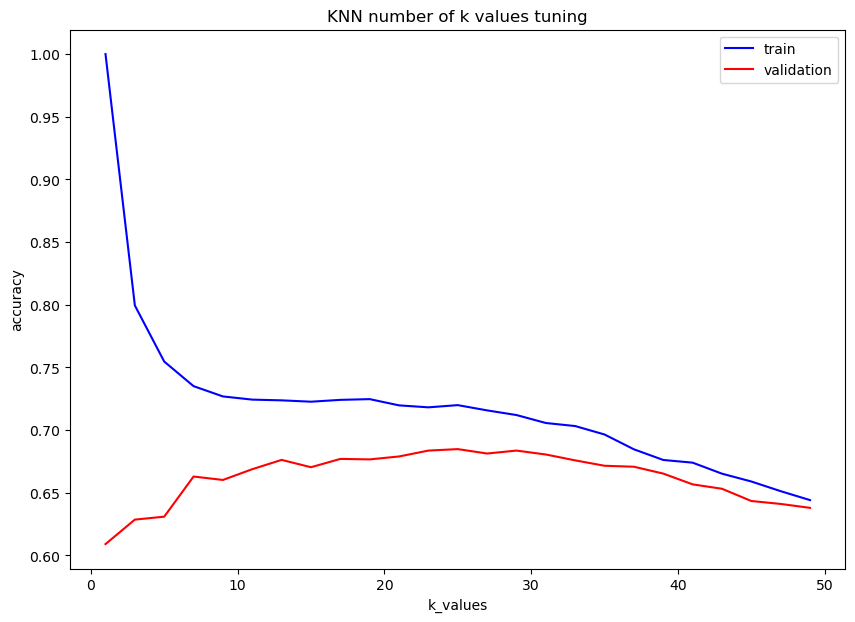

In [104]:
plt.figure(figsize=(10, 7))
plt.plot(k_values, train_scores, c='blue', label='train')
plt.plot(k_values, validation_scores, c='red', label='validation')
plt.xlabel('k_values')
plt.ylabel('accuracy')
plt.title("KNN number of k values tuning")
plt.legend()
plt.show()

In [111]:
knn_model_results = pd.DataFrame({'k_values':k_values,'train_acc':train_scores,'validation_acc':validation_scores})
knn_model_results['acc_diff'] = knn_model_results['train_acc'] - knn_model_results['validation_acc']
knn_model_results.sort_values(['validation_acc','acc_diff'],ascending = [False,True]).head(10)

,k_values,train_acc,validation_acc,acc_diff
12,25,0.719867,0.684766,0.035102
14,29,0.711955,0.683594,0.028362
11,23,0.718109,0.683594,0.034515
13,27,0.715667,0.681250,0.034417
15,31,0.705607,0.680469,0.025138
10,21,0.719672,0.678906,0.040766
8,17,0.724067,0.676953,0.047114
9,19,0.724653,0.676562,0.048091
6,13,0.723676,0.676172,0.047505
16,33,0.703165,0.675781,0.027383


- **As we can see here the Optimal Value for K in the KNN algorithm for our dataset is 25 because it has  68.5% validation accuracy score with almost 72% train accuracy score and the accuracy difference is considered low comparing to others.** We can see on the table and codes below that the lowest difference of train and validation accuracy is for k_value = 49 but the accuracy score is low. In that table k_value = 25 is the 14th one and the difference accuracy is low and optimal comparing to others. Hence, I believe the Optimal Value for K in the KNN model for our data set is 25. 

In [105]:
# the index of the minimal distance
best_idx = np.argmin(np.abs(np.array(train_scores) - np.array(validation_scores)))
k_values[best_idx]

49

- This table is ordered by the difference of train and validation accuracy scores:

In [113]:
knn_model_results.sort_values(['acc_diff'],ascending = [True]).head(15)

,k_values,train_acc,validation_acc,acc_diff
24,49,0.644071,0.637891,0.006180
23,47,0.651201,0.641016,0.010186
19,39,0.676109,0.665234,0.010874
21,43,0.665169,0.653125,0.012044
18,37,0.684606,0.670703,0.013903
22,45,0.658918,0.643359,0.015558
20,41,0.673960,0.656641,0.017319
17,35,0.696425,0.671484,0.024941
15,31,0.705607,0.680469,0.025138
16,33,0.703165,0.675781,0.027383


- The above chart is for where the training and validation accuracy is the closest and we can see that K_value = 25 is the 14th one and it fits in one of the lowest categories in terms of accuracy difference which is a good thing. Because the closest our train and validation dataset, the better model. **Therefore, I believe the Optimal value for k is 25.** 

 ### 2e

- Splitting the data into train and validation sets **after** performing vectorization can lead to data leakage, where information from the validation set leaks into the training set. This can cause the model to perform well on the validation set, but poorly on unseen data. To avoid this, it is important to split the data into train and validation sets before performing any preprocessing or feature engineering steps, such as vectorization. This way, the validation set will truly reflect the performance of the model on unseen data. 

- In the previous question, Since we are given a pre-vectorized data, it has already got leakage in there. Because I did not vectorize the data myself and the leakage is out of my hands, I set up a validation set and I used it accordingly.

## Question 3 : Decision Tree Classifier

 ### 3a

- Unlike KNN algorithms which they are highly sensitive to scale and if we do not scale our data, the features with large scales will dominate on features with small scales, the decision tree classifier is not sensitive to scale and scaling make no difference because decision tree algorithm is considering one feature at a time when it is making the splits. Hence, we are not going to scale our data here. Now, let's fit the Decision tree model on our dataset:

In [135]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Instantiate & fit the DT

DT_model = DecisionTreeClassifier()
DT_model.fit(X_train, y_train)


# Make predictions on test data

y_pred = DT_model.predict(X_test)

# Calculate accuracy score on test set

accuracy = accuracy_score(y_test, y_pred)
print("Test dataset Accuracy Score:", accuracy)

Test dataset Accuracy Score: 0.7051792828685259


- Without max_depth our model is giving different accuracy scores on test dataset. for the code above we see that it gave us 70.5% accuracy on test score. Now let's see the accuracy for a max_depth with a number (for example 4):

In [139]:
# Instantiate & fit the DT

DT_model = DecisionTreeClassifier(max_depth = 4)
DT_model.fit(X_train, y_train)
 

# Training and test score

print(f"The train accuracy score is:  {DT_model.score(X_train,y_train)}")
print(f"The test accuracy score  is:  {DT_model.score(X_test,y_test)}")

The train accuracy score is:  0.7389435849351461
The test accuracy score  is:  0.734239512538083


- With max_depth = 4 , our model is giving us accuracy score of 73.9% on train dataset and the accuracy score of 73.4% on test dataset.

- Now let's find the best and optimal value of max_depth for the decision tree model and best accuracy score that we can get for our model on our dataset:

In [121]:
for depth in range(1,20):
    
    DT_model = DecisionTreeClassifier(max_depth = depth)
    DT_model.fit(X_train,y_train)
    print(f"max depth={depth}")
    print("------------------")
    print(f"train accuracy:{DT_model.score(X_train,y_train)}")
    print(f"test accuracy:{DT_model.score(X_test,y_test)} \n")

max depth=1
------------------
train accuracy:0.6406469760900141
test accuracy:0.6318256386219827 

max depth=2
------------------
train accuracy:0.7051883106735427
test accuracy:0.7084602765408953 

max depth=3
------------------
train accuracy:0.7220659478043444
test accuracy:0.720881181157722 

max depth=4
------------------
train accuracy:0.7389435849351461
test accuracy:0.734239512538083 

max depth=5
------------------
train accuracy:0.7551961243944366
test accuracy:0.739629716428404 

max depth=6
------------------
train accuracy:0.7666822941084545
test accuracy:0.7515819076634638 

max depth=7
------------------
train accuracy:0.776840131270511
test accuracy:0.7562690414811343 

max depth=8
------------------
train accuracy:0.792701984685107
test accuracy:0.7466604171549098 

max depth=9
------------------
train accuracy:0.8066104078762306
test accuracy:0.7466604171549098 

max depth=10
------------------
train accuracy:0.8247382403500547
test accuracy:0.7363487227560347 

max 

- The code above, is calculating train and test accuracy score for max_depths from 1 to 19. The code below is the visualization of Decision Tree accuracy for max_depths from 1 to 14:

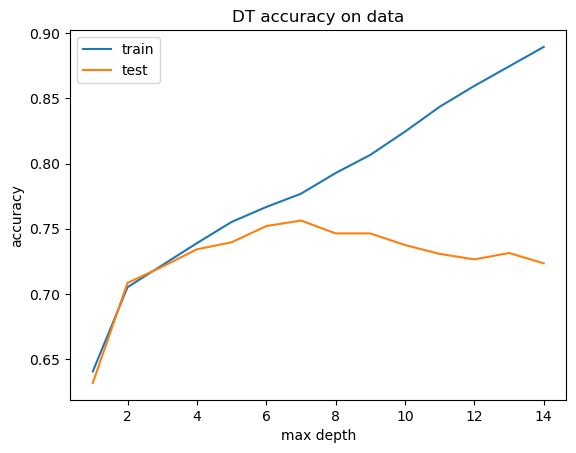

In [143]:
# Tree model
# train/test accuracy
# on unscaled and then scaled data

train_accs = []
test_accs = []


depth_values = list(range(1,15))

# set up a loop for unscaled data

for i in depth_values:
    my_dt = DecisionTreeClassifier(max_depth = i)
    my_dt.fit(X_train,y_train)
    
    train_accs.append(my_dt.score(X_train,y_train))
    test_accs.append(my_dt.score(X_test,y_test))

# plot unscaled classifier results    
plt.figure()
plt.plot(depth_values, train_accs, label = 'train')
plt.plot(depth_values, test_accs, label = 'test')
plt.legend()
plt.xlabel('max depth')
plt.ylabel('accuracy')
plt.title('DT accuracy on data')
plt.show()
    

- We can see from the plot that our dataset shows overfitting after max_depth = 8 and it shows underfitting before max_depth = 4. The best accuracy score for our test set is on max_depth = 7 and it is 75.6% and I believe this is the optimal value for max_depth too because our train and test scores are the closest and after this point we will observe overfitting on our model.

- Let's run decision tree model for max_depth = 7, which is the optimal value for max_depth and our model has the highest test score at this point: 

In [145]:
# Instantiate & fit the DT

DT_model = DecisionTreeClassifier(max_depth = 7)
DT_model.fit(X_train, y_train)
 

# Training and test score

print(f"The train accuracy score is:  {DT_model.score(X_train,y_train)}")
print(f"The test accuracy score  is:  {DT_model.score(X_test,y_test)}")

The train accuracy score is:  0.776840131270511
The test accuracy score  is:  0.7562690414811343


- **I got 75.6% accuracy score on the test dataset with max_depth=7.**

 ### 3b

- Since we are given a pre-vectorized data, if we separate the train data into train and validation datasets, it has already got leakage in there. Because I did not vectorize the data myself and the leakage is out of my hands, I am going to set up a validation set  and I am going to use it accordingly. However, if I had the vectorization in my hands, I would have done train, validation and test datasets differently.
- Let's split the dataset into train and validation sets:

In [146]:
# Splitting the train dataset in train and validation datasets

from sklearn.model_selection import train_test_split

X_train_new, X_validation, y_train_new, y_validation = train_test_split(X_train, y_train, test_size = 0.2, random_state=17)



- Now let's see the shape of test, validation and our new train datasets:

In [147]:
print(f'Shape of test set: {X_test.shape}')
print(f'Shape of validation set: {X_validation.shape}')
print(f'Shape of new train set: {X_train_new.shape}')

Shape of test set: (4267, 2743)
Shape of validation set: (2560, 2743)
Shape of new train set: (10238, 2743)


- Now let's find an optimal value for the maximum depth of the decision tree:

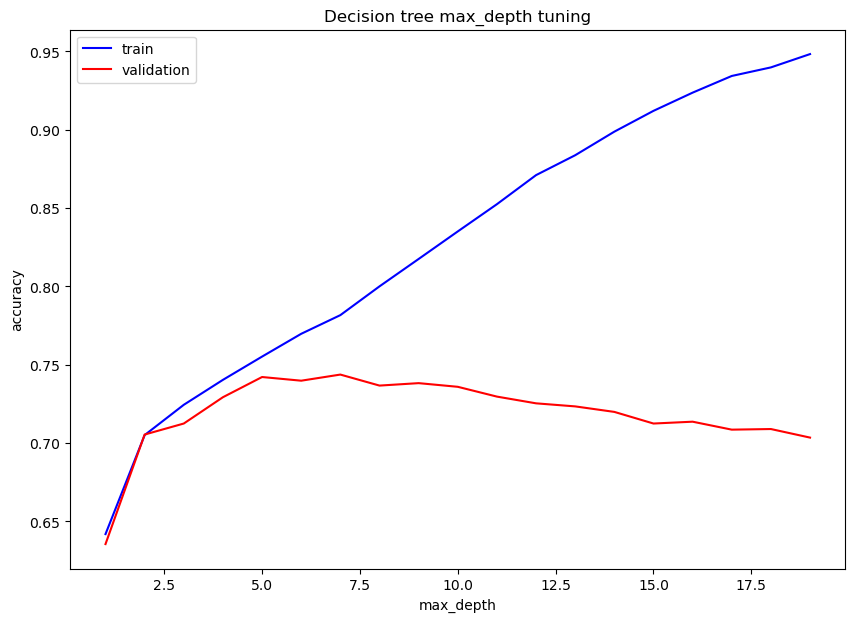

In [165]:
from sklearn.tree import DecisionTreeClassifier

depths = list(range(1, 20))
train_scores = []
validation_scores = []

for d in depths:    
    dt = DecisionTreeClassifier(max_depth = d)
    dt.fit(X_train_new, y_train_new)
    
    # Evaluate
    train_scores.append(dt.score(X_train_new, y_train_new))
    validation_scores.append(dt.score(X_validation, y_validation))
    
plt.figure(figsize=(10, 7))
plt.plot(depths, train_scores, c='blue', label='train')
plt.plot(depths, validation_scores, c='red', label='validation')
plt.xlabel('max_depth')
plt.ylabel('accuracy')
plt.title("Decision tree max_depth tuning")
plt.legend()
plt.show()

- From the plot above, we understand that our optimal value for maximum depth should be between 4 and 8, because after 8 we see overfitting and before 4 we see underfitting. Let's run a for loop to find the train and validation scores for this range:

In [226]:
for depth in range(4,9):
    
    DT_model = DecisionTreeClassifier(max_depth = depth, random_state=17)
    DT_model.fit(X_train_new, y_train_new)
    print(f"max depth={depth}")
    print("------------------")
    print(f"train accuracy:{DT_model.score(X_train_new, y_train_new)}")
    print(f"validation accuracy:{DT_model.score(X_validation, y_validation)} \n")

max depth=4
------------------
train accuracy:0.7403789802695839
validation accuracy:0.729296875 

max depth=5
------------------
train accuracy:0.7552256300058605
validation accuracy:0.742578125 

max depth=6
------------------
train accuracy:0.7697792537605
validation accuracy:0.739453125 

max depth=7
------------------
train accuracy:0.7816956436804063
validation accuracy:0.74375 

max depth=8
------------------
train accuracy:0.8000586051963274
validation accuracy:0.737109375 



- In this part, I believe the optimal value for the maximum depth of the decision tree is max_depth=5. In this part, we see that our validation accuracy score for max_depth=5 and max_depth = 7 are almost the same. However, in max_depth = 5 the train and validation scores are the closest and their accuracy are so close to each other ( 74.25% and 75.5% ). Moreover at max_depth=5 our model is less complex and the run-time for the model is lower than max_depth = 7.

- As the maximum depth of a decision tree increases, the complexity of the model also increases, as the tree becomes more "deep" with more levels and decision points, Moreover, the run-time of the model also increases,too. This is because a deeper tree requires more splits and more calculations to be made, resulting in a longer run-time.

- **So, I believe the optimal value for the maximum depth of the decision tree in this part is max_depth=5. Because, we get almost the same accuracy score for validation set comparing to max_depth=7, and the train and validation scores are the closest at this point. Moreover, our model is less complex with lower run-time.**

 ### 3c

- 2 Advantages of Decision Trees over KNN:

 1. Decision trees are more interpretable: Decision trees are easy to understand and interpret as they are based on a series of simple decisions. The tree structure provides a clear visual representation of how the model makes predictions. This can be useful for understanding how the model is making its predictions and for communicating the model to others.

 2. Decision trees can handle missing data: Decision trees can handle missing data by using the most frequent class or the mean of the available classes. KNN, on the other hand, requires all data to be complete for predictions to be made.


- 2 Weaknesses of Decision Trees:

 1. Decision trees can overfit: Decision trees can easily overfit the data if the tree is too deep and complex. This can result in poor generalization and poor performance on new, unseen data.

 2. Decision trees can be unstable: Decision trees are sensitive to small changes in the data. Even small changes in the data can result in a completely different tree and different predictions. This can make decision trees less reliable for predictions and can make them difficult to reproduce.

## Question 4 : Validation Set

The purpose of the validation set: It is to evaluate the performance of a model during the training phase. It is used to fine-tune the model and select the best model parameters, such as the number of layers in a neural network or the depth of a decision tree.

Validation set: The validation set is different from the test set in that it is used during the training phase, while the test set is used after the training phase to evaluate the final performance of the model. The validation set is typically used to evaluate different versions of the model, such as different architectures or hyperparameters, and to select the best one. It is also used to prevent overfitting by monitoring the performance of the model on a separate set of data during the training phase.

Test set: The test set, on the other hand, is used to evaluate the final performance of the model after it has been trained and fine-tuned using the validation set. It is used to estimate the generalization error of the model, and it is important that the test set is not used during the training or validation process to avoid bias.

- Validation set: Used to tune a model's hyperparameters, such as the regularization penalty in logistic regression. This serves as a somewhat unbiased estimate of the model's performance. Since the model is not fitted on this data it should not overfit when using the fit parameter to it. But since we are adjusting the hyperparameters on this set we still implicitly overfit to it.


- Test set: Used to provide a totally unbiased estimate of the model's performance. This is data the model has never seen; it should serve as a good predictor for the model's performance once deployed and making prediction on new data.

## Question 5 : Hyperparameter Optimization

 ### 5a

I am going to perform a 5-fold cross validation to optimize the hyperparameters of the Logistic Regression model: ( We saw that in Logistic Regression (Question 2), we had better accuracy score after scaling, so will use the scaled data here.)

In [218]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV


# Define the parameter grid for logistic regression
param_grid = {'C': np.logspace(-3,7,11), 'penalty': ['l1','l2']}

# Create a logistic regression object
log_reg = LogisticRegression(random_state=17)

# Create a GridSearchCV object
log_reg_cv = GridSearchCV(log_reg, param_grid, cv=5)

# Fit the data to the model
log_reg_cv.fit(X_train_scaled, y_train)

# Print the best parameters
print("Best parameters: ", log_reg_cv.best_params_)


Best parameters:  {'C': 0.001, 'penalty': 'l2'}


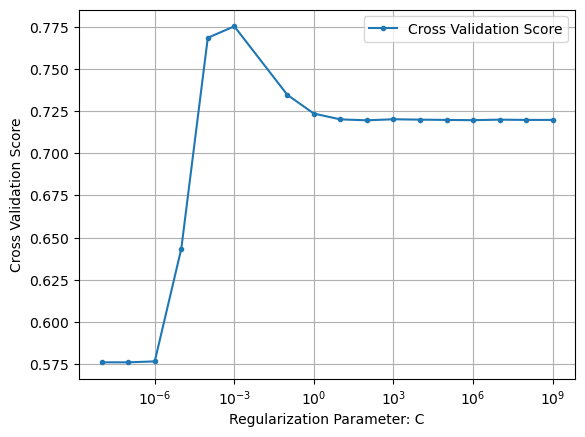

The best model has C =  0.001


In [221]:
### 5-fold cross validation ###

cross_validation_scores = []

C_range = np.array([.00000001,.0000001,.000001,.00001,.0001,.001,.1,\
                1,10,100,1000,10000,100000,1000000,10000000,100000000,1000000000])

#Do some cross validation
for c in C_range:
    LR_model = LogisticRegression(C=c,random_state=17)
    cv_score = np.mean(cross_val_score(LR_model, X_train_scaled, y_train, cv = 5))
    cross_validation_scores.append(cv_score)

plt.figure()
plt.plot(C_range, cross_validation_scores,label="Cross Validation Score",marker='.')
plt.legend()
plt.xscale("log")
plt.xlabel('Regularization Parameter: C')
plt.ylabel('Cross Validation Score')
plt.grid()
plt.show();

which_max = np.array(cross_validation_scores).argmax()

print("The best model has C = ",C_range[which_max])

- Here we saw in th plot above and the code above the plot that the best C is 0.001 and penalty, which is the type of regularization to be applied, is 'l2' (Ridge) regularization.

- Now let's perform a 5-fold cross validation to optimize the hyperparameters of the Decision Tree model:

In [196]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer,accuracy_score



# Define the parameter grid for decision tree
param_grid = {'max_depth': [4, 5, 6, 7, 8], 'min_samples_split': [2, 5, 10]}

# Create a decision tree object
DT_model = DecisionTreeClassifier()


# Create a GridSearchCV object
DT_model_cv = GridSearchCV(DT_model, param_grid, cv=5, scoring = make_scorer(accuracy_score))

# Fit the data to the model
DT_model_cv.fit(X_train, y_train)

# Print the best parameters
print("Best parameters: ", DT_model_cv.best_params_)


Best parameters:  {'max_depth': 7, 'min_samples_split': 2}


- We are observing that best max_depth is 7 and min_samples_split is 2. In my model the best accuracy score was for max_depth=7 too and the only reason I choose max_depth=5 was because it had almost the same accuracy score as 7 and the diff_acc was the closest at 5. So, the model could have better outcome on test data and lower run-time and complexity.

 ### 5b

- This is how confusion matrix for Logistic Regression model looks like for the best model on the test set:

Logistic Regression Confusion matrix: 



<Figure size 1000x300 with 0 Axes>

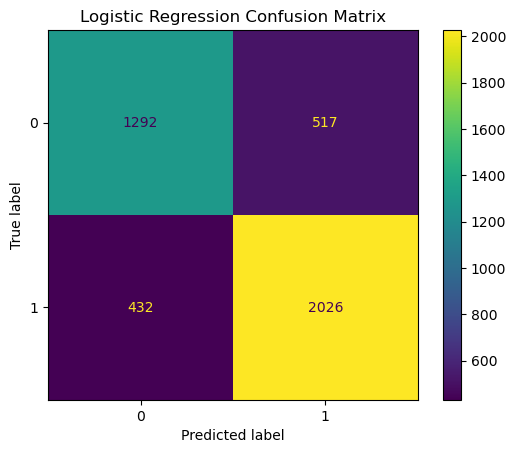


Scaled data classification report: 
               precision    recall  f1-score   support

           0       0.75      0.71      0.73      1809
           1       0.80      0.82      0.81      2458

    accuracy                           0.78      4267
   macro avg       0.77      0.77      0.77      4267
weighted avg       0.78      0.78      0.78      4267



In [227]:
#########################################
### Logistic Regression MODEL FITTING ###
#########################################
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import classification_report

# on the original data
credit_logit = LogisticRegression(solver='lbfgs', random_state=17, C=0.001, penalty='l2')
credit_logit.fit(X_train_scaled, y_train)

# evaluate on the original test set
y_pred = credit_logit.predict(X_test_scaled)

# classification report
report_initial = classification_report(y_test, y_pred)



#####################
### PRINT RESULTS ###
#####################

print_line = "\n=======================================================\n"

# Confusion matrices
print("Logistic Regression Confusion matrix:", print_line)

plt.figure(figsize=(10, 3))

# Model on the original data
ConfusionMatrixDisplay.from_estimator(credit_logit, X_test_scaled, y_test)
plt.title('Logistic Regression Confusion Matrix')



plt.show()

# Classification Reports
print("\nScaled data classification report:", print_line, report_initial)

- This is how confusion matrix for Decision Tree model looks like for the best model on the test set:

Decision Tree Confusion matrix: 



<Figure size 1000x300 with 0 Axes>

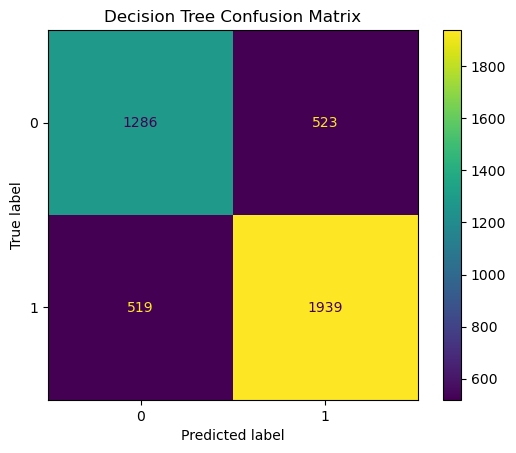


Original data classification report: 
               precision    recall  f1-score   support

           0       0.71      0.71      0.71      1809
           1       0.79      0.79      0.79      2458

    accuracy                           0.76      4267
   macro avg       0.75      0.75      0.75      4267
weighted avg       0.76      0.76      0.76      4267



In [228]:
###################################
### Decision Tree MODEL FITTING ###
###################################
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import classification_report

# on the original data
credit_DT = DecisionTreeClassifier(max_depth=7, min_samples_split=2,random_state=17)
credit_DT.fit(X_train, y_train)

# evaluate on the original test set
y_pred = credit_DT.predict(X_test)

# classification report
report_initial = classification_report(y_test, y_pred)



#####################
### PRINT RESULTS ###
#####################

print_line = "\n=======================================================\n"

# Confusion matrices
print("Decision Tree Confusion matrix:", print_line)

plt.figure(figsize=(10, 3))

# Model on the original data
ConfusionMatrixDisplay.from_estimator(credit_DT, X_test, y_test)
plt.title('Decision Tree Confusion Matrix')



plt.show()

# Classification Reports
print("\nOriginal data classification report:", print_line, report_initial)

## Question 6 : Adding New Feature

 ### 6a

One possible new feature that I would consider adding to this dataset is a "review_sentiment" feature, which would be calculated based on the ratio of positive to negative words used in the reviews. This feature would be calculated as the ratio of Review_Total_Positive_Word_Counts to Review_Total_Negative_Word_Counts.

The reason I consider this feature to be useful is that the sentiment of a review can often indicate how satisfied the customer is with a product or service. Reviews with more positive words are likely to indicate a higher level of satisfaction, while reviews with more negative words are likely to indicate a lower level of satisfaction.

I believe that including this feature in the model would improve the accuracy of the model, as it would provide the model with more information about the customer's satisfaction level and allow it to make more informed predictions. Additionally, this feature would be highly correlated with the target variable, which would help the model to better capture the underlying patterns in the data.

Furthermore, this feature could be used to group the reviews based on the sentiment and the accuracy could be improved by considering the group of the reviews separately.
Also, by adding this feature, the model could identify the correlation between the sentiment of the review and other features such as location and the number of reviews.

- Let's add the new feature to the dataset and do the train,test split:

In [276]:
# Load the train and test datasets

train_data = pd.read_csv('clean_train_dataframe.csv')
test_data = pd.read_csv('clean_test_dataframe.csv')

# Create the new feature 'review_sentiment'
train_data['review_sentiment'] = train_data['Review_Total_Positive_Word_Counts'] / train_data['Review_Total_Negative_Word_Counts']
test_data['review_sentiment'] = test_data['Review_Total_Positive_Word_Counts'] / test_data['Review_Total_Negative_Word_Counts']

#train_data = train_data.drop(columns=['Review_Total_Positive_Word_Counts', 'Review_Total_Negative_Word_Counts'])
#test_data = test_data.drop(columns=['Review_Total_Positive_Word_Counts', 'Review_Total_Negative_Word_Counts'])


# Handle the division by zero if exists
train_data['review_sentiment'] = train_data['review_sentiment'].replace([np.inf, -np.inf], 0)
test_data['review_sentiment'] = test_data['review_sentiment'].replace([np.inf, -np.inf], 0)

# fill missing values with the mean value of the feature
train_data['review_sentiment'].fillna(train_data['review_sentiment'].mean(), inplace=True)
test_data['review_sentiment'].fillna(test_data['review_sentiment'].mean(), inplace=True)

# Split the train dataset into features and Target

X_train = train_data.drop('rating', axis=1)
y_train = train_data['rating']

# Split the test dataset into features and Target

X_test = test_data.drop('rating', axis=1)
y_test = test_data['rating']

 ### 6b

- Let's run the models from question 5 again and re-optimize the hyperparameters: 

In [277]:
from sklearn.preprocessing import StandardScaler

# Scale the data

scaler = StandardScaler()

# Fit and transform the train data and ONLY transform the test data

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [278]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV


# Define the parameter grid for logistic regression
param_grid = {'C': np.logspace(-3,7,11), 'penalty': ['l1','l2']}

# Create a logistic regression object
log_reg = LogisticRegression(random_state=17)

# Create a GridSearchCV object
log_reg_cv = GridSearchCV(log_reg, param_grid, cv=5)

# Fit the data to the model
log_reg_cv.fit(X_train_scaled, y_train)

# Print the best parameters
print("Best parameters: ", log_reg_cv.best_params_)


Best parameters:  {'C': 0.001, 'penalty': 'l2'}


Logistic Regression Confusion matrix: 



<Figure size 1000x300 with 0 Axes>

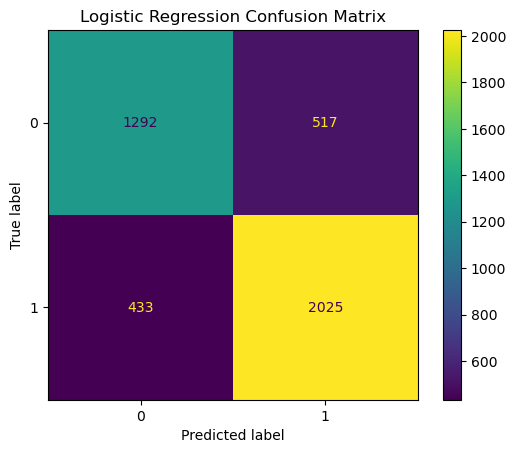


Scaled data classification report: 
               precision    recall  f1-score   support

           0       0.75      0.71      0.73      1809
           1       0.80      0.82      0.81      2458

    accuracy                           0.78      4267
   macro avg       0.77      0.77      0.77      4267
weighted avg       0.78      0.78      0.78      4267



In [279]:
#########################################
### Logistic Regression MODEL FITTING ###
#########################################
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import classification_report

# on the original data
credit_logit = LogisticRegression(solver='lbfgs', random_state=17, C=0.001, penalty='l2')
credit_logit.fit(X_train_scaled, y_train)

# evaluate on the original test set
y_pred = credit_logit.predict(X_test_scaled)

# classification report
report_initial = classification_report(y_test, y_pred)



#####################
### PRINT RESULTS ###
#####################

print_line = "\n=======================================================\n"

# Confusion matrices
print("Logistic Regression Confusion matrix:", print_line)

plt.figure(figsize=(10, 3))

# Model on the original data
ConfusionMatrixDisplay.from_estimator(credit_logit, X_test_scaled, y_test)
plt.title('Logistic Regression Confusion Matrix')



plt.show()

# Classification Reports
print("\nScaled data classification report:", print_line, report_initial)

- For Logistic Regression the hyperparameters did not change and the accuracy score of the data is also the same. Now let's look at the Decision Tree model:

In [280]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer,accuracy_score



# Define the parameter grid for decision tree
param_grid = {'max_depth': [4, 5, 6, 7, 8], 'min_samples_split': [2, 5, 10]}

# Create a decision tree object
DT_model = DecisionTreeClassifier()


# Create a GridSearchCV object
DT_model_cv = GridSearchCV(DT_model, param_grid, cv=5, scoring = make_scorer(accuracy_score))

# Fit the data to the model
DT_model_cv.fit(X_train, y_train)

# Print the best parameters
print("Best parameters: ", DT_model_cv.best_params_)


Best parameters:  {'max_depth': 5, 'min_samples_split': 5}


Decision Tree Confusion matrix: 



<Figure size 1000x300 with 0 Axes>

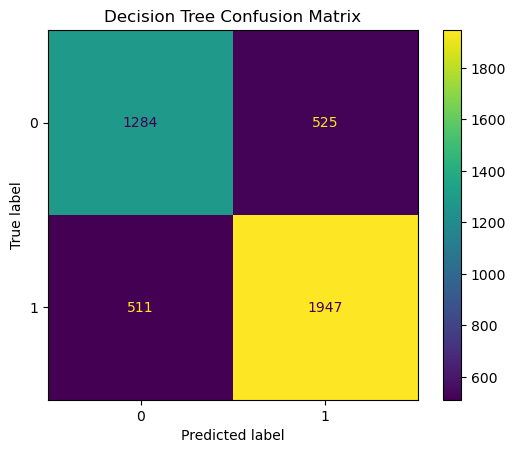


Original data classification report: 
               precision    recall  f1-score   support

           0       0.72      0.71      0.71      1809
           1       0.79      0.79      0.79      2458

    accuracy                           0.76      4267
   macro avg       0.75      0.75      0.75      4267
weighted avg       0.76      0.76      0.76      4267



In [281]:
###################################
### Decision Tree MODEL FITTING ###
###################################
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import classification_report

# on the original data
credit_DT = DecisionTreeClassifier(max_depth=5, min_samples_split=5,random_state=17)
credit_DT.fit(X_train, y_train)

# evaluate on the original test set
y_pred = credit_DT.predict(X_test)

# classification report
report_initial = classification_report(y_test, y_pred)



#####################
### PRINT RESULTS ###
#####################

print_line = "\n=======================================================\n"

# Confusion matrices
print("Decision Tree Confusion matrix:", print_line)

plt.figure(figsize=(10, 3))

# Model on the original data
ConfusionMatrixDisplay.from_estimator(credit_DT, X_test, y_test)
plt.title('Decision Tree Confusion Matrix')



plt.show()

# Classification Reports
print("\nOriginal data classification report:", print_line, report_initial)

- In Decision Tree model the hyperparameters changed and the optimized hyperparameters here is :  max_depth=5, and     min_samples_split = 5. The accuracy of the test score is also the same so I have to go through higher level feature engineering methods to add or create new features from existing ones. Further work is needed in this part.